In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Learning

## action rate

In [3]:

#action rate
# Function to load and plot data from CSV files
def plot_action_rate(file_paths, labels):
    plt.figure(figsize=(10, 6))
    
    for file_path, label in zip(file_paths, labels):
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Assuming columns are named 'Step' and 'Value'
        timesteps = df['Step']
        reward_action_rate = df['Value']
        
        # Plot the data
        plt.plot(timesteps, reward_action_rate, label=label)
    
    # Add labels and title
    plt.xlabel('Timesteps')
    plt.ylabel('Action Rate Reward')
    plt.title('Episode Reward / Action Rate over Timesteps')
    
    # Add legend
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Example usage:
file_paths = [
    'data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv',
    #'path_to_your/skrl_lift_2024-09-13_20-44-46-torque-best.csv'
]
#labels = ['OG', 'Torque-Best']
labels = ['OG']

# Call the function to plot
plot_action_rate(file_paths, labels)


NameError: name 'plt' is not defined

## average reward

        Model   Step      Value
0    OG Model    120   2.125501
1    OG Model    240   1.034547
2    OG Model    360   0.320464
3    OG Model    480   0.434772
4    OG Model    600   0.910224
..        ...    ...        ...
195  OG Model  23520  43.865108
196  OG Model  23640  44.460709
197  OG Model  23760  44.402061
198  OG Model  23880  44.310970
199  OG Model  24000  44.687328

[200 rows x 3 columns]


C:\Users\alina\AppData\Local\Temp\ipykernel_20468\3498832017.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)


\begin{tabular}{lr}
\toprule
Model & Final Reward \\
\midrule
OG Model & 44.687328 \\
\bottomrule
\end{tabular}



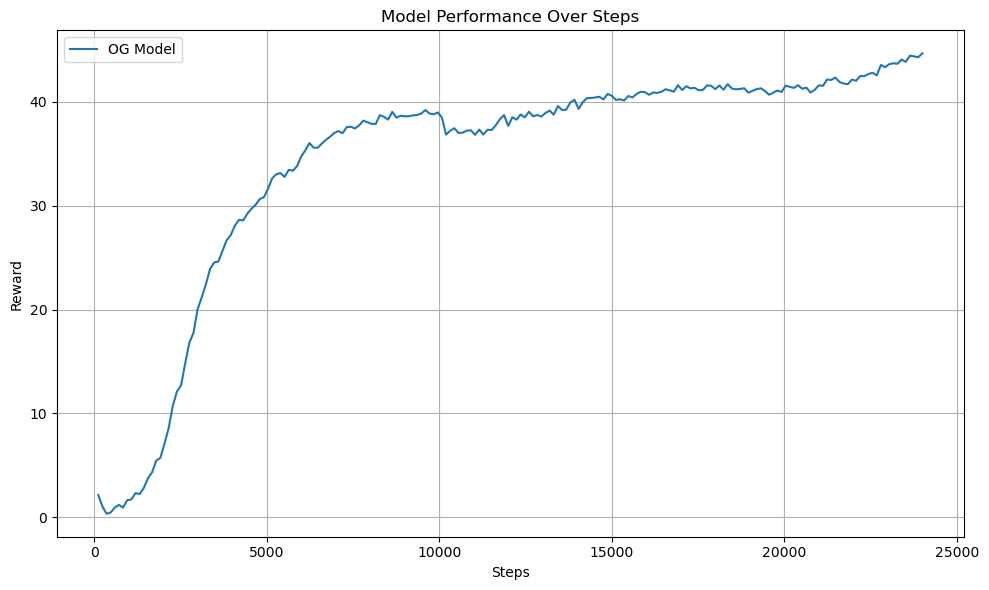

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
# Add the CSV file paths and the corresponding model names
file_paths = [
    'data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv',  # Update with actual paths
    #'path_to_your/another_model.csv'  # Add more file paths as needed
]
model_names = [
    'OG Model',  # Model names corresponding to the CSV files
    #'Another Model'
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Create a DataFrame for the LaTeX table
latex_table_df = final_rewards[['Model', 'Value']].rename(columns={'Value': 'Final Reward'})

# Convert the LaTeX table DataFrame to LaTeX format
latex_table = latex_table_df.to_latex(index=False)
print(latex_table)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Model Performance Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## torque

                     Model   Step      Value
0    4 Layers Batch Torque    120  -9.856690
1    4 Layers Batch Torque    240 -13.446279
2    4 Layers Batch Torque    360 -14.663562
3    4 Layers Batch Torque    480 -12.657195
4    4 Layers Batch Torque    600 -11.651456
..                     ...    ...        ...
195  4 Layers Batch Torque  23520  -1.875674
196  4 Layers Batch Torque  23640  -1.909284
197  4 Layers Batch Torque  23760  -1.833970
198  4 Layers Batch Torque  23880  -1.804625
199  4 Layers Batch Torque  24000  -1.744331

[200 rows x 3 columns]


C:\Users\alina\AppData\Local\Temp\ipykernel_23032\3975223262.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)


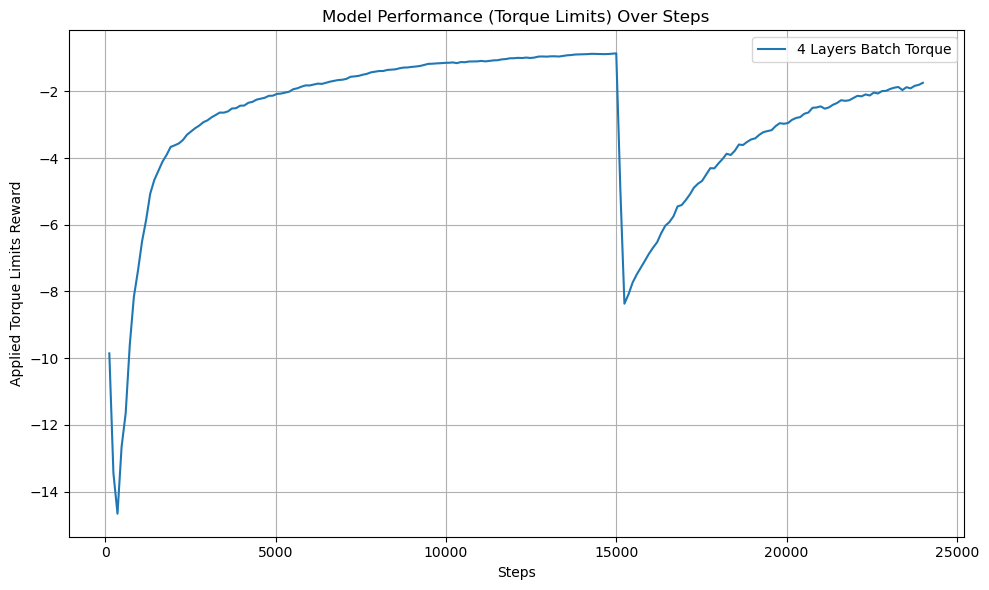

In [15]:
#terque
import pandas as pd
import matplotlib.pyplot as plt

# Function to process a CSV file and return relevant data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
file_paths = [
    'data/rewards/torque/skrl_lift_2024-09-17_18-38-18-4layers-batch-torque.csv'  # Replace with actual path
]
model_names = [
    '4 Layers Batch Torque'  # Name corresponding to the file
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Applied Torque Limits Reward')
plt.title('Model Performance (Torque Limits) Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## reaching

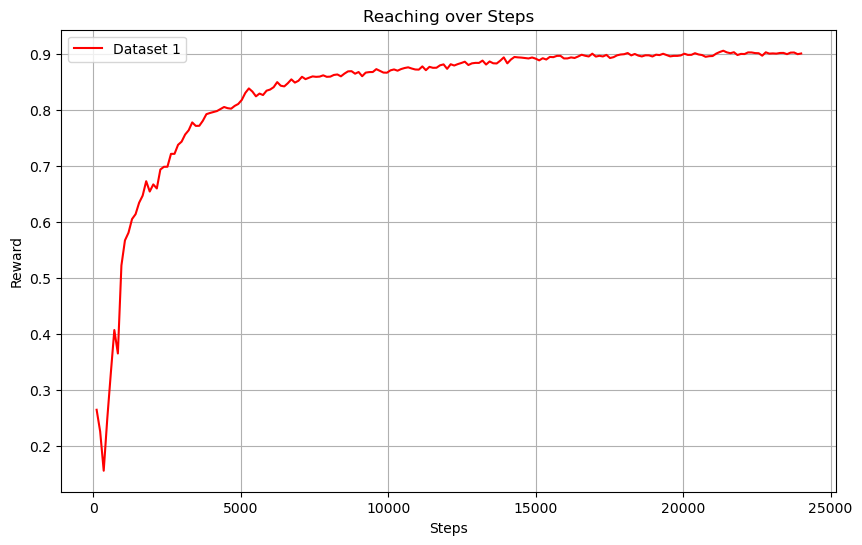

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
data1 = pd.read_csv('data/rewards/reaching/skrl_lift_2024-09-13_22-25-30-og-reaching.csv')

# Plotting function that can handle multiple datasets
def plot_rewards(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create a plot
plt.figure(figsize=(10,6))

# Plot the first line
plot_rewards(data1, label='Dataset 1', color='red')

# You can load another dataset from a different CSV file and plot it similarly:
# Uncomment the next lines to add another CSV file:
# data2 = pd.read_csv('path_to_another_csv.csv')
# plot_rewards(data2, label='Dataset 2', color='blue')

# Adding labels and title
plt.title('Reaching over Steps')
plt.xlabel('Steps')
plt.ylabel('Reward')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## policy standard deviation

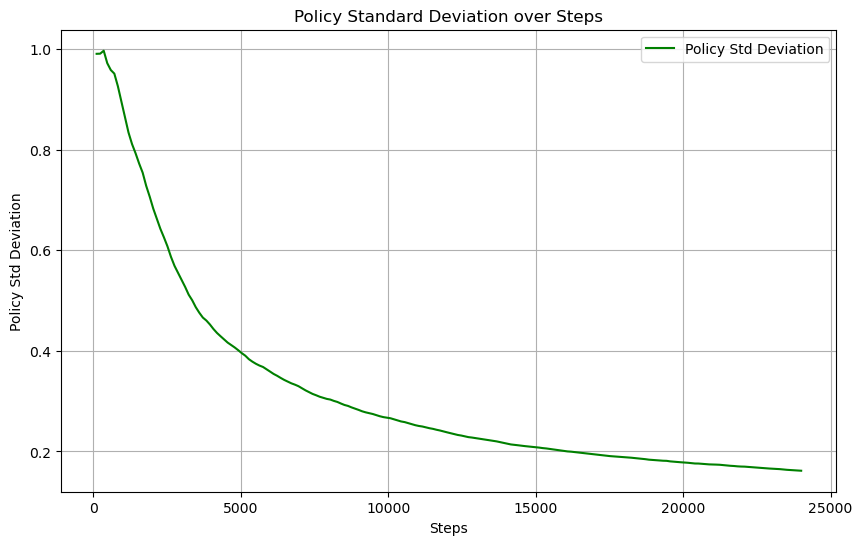

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the policy standard deviation dataset
policy_data = pd.read_csv('data/policy/skrl_lift_2024-09-13_22-25-30-og-policy.csv')

# Plotting function for policy standard deviation
def plot_policy_std(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create the plot for policy standard deviation
plt.figure(figsize=(10,6))

# Plot policy standard deviation data
plot_policy_std(policy_data, label='Policy Std Deviation', color='green')

# Optionally add another dataset for comparison:
# Uncomment the next lines to add another CSV file:
# another_policy_data = pd.read_csv('path_to_another_csv.csv')
# plot_policy_std(another_policy_data, label='Another Policy', color='purple')

# Adding labels and title
plt.title('Policy Standard Deviation over Steps')
plt.xlabel('Steps')
plt.ylabel('Policy Std Deviation')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


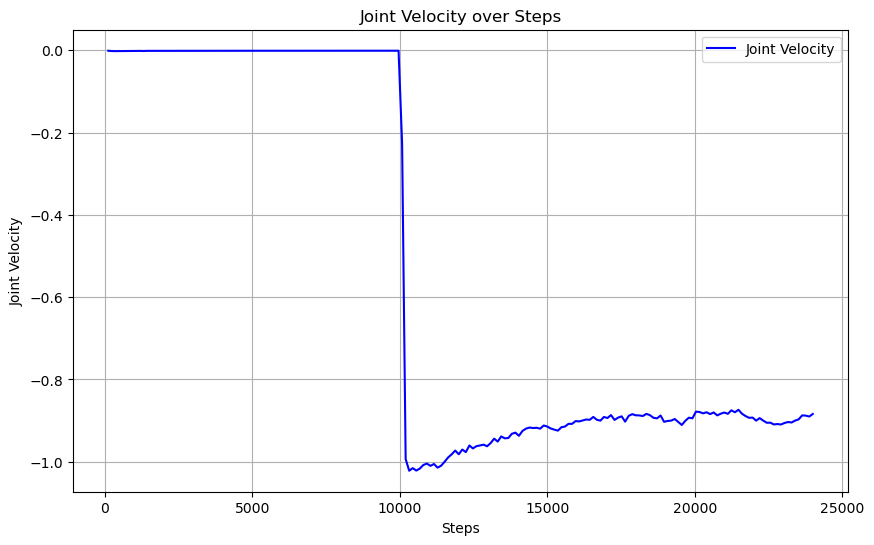

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the joint velocity dataset
joint_velocity_data = pd.read_csv('data/rewards/joint_vel/skrl_lift_2024-09-13_22-25-30-og-Jvel.csv')

# Plotting function for multiple datasets
def plot_velocity(data, label, color):
    plt.plot(data['Step'], data['Value'], label=label, color=color)

# Create the plot for joint velocity
plt.figure(figsize=(10,6))

# Plot joint velocity data
plot_velocity(joint_velocity_data, label='Joint Velocity', color='blue')

# Optionally add another dataset (e.g., joint velocity from a second CSV):
# Uncomment the next lines to add another CSV file:
# another_velocity_data = pd.read_csv('path_to_another_csv.csv')
# plot_velocity(another_velocity_data, label='Another Dataset', color='green')

# Adding labels and title
plt.title('Joint Velocity over Steps')
plt.xlabel('Steps')
plt.ylabel('Joint Velocity')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Last value for Baseline model in Mean Rewards Over Steps: 47.3647
Last value for Tuned Symmetric Model in Mean Rewards Over Steps: 42.4603
Last value for Tuned Asymetric model in Mean Rewards Over Steps: 46.5293
Last value for RPO Asymmentric Model in Mean Rewards Over Steps: 44.6999
Last value for Baseline model in Policy Standard Deviation Over Steps: 0.1649
Last value for Tuned Symmetric Model in Policy Standard Deviation Over Steps: 0.0624
Last value for Tuned Asymetric model in Policy Standard Deviation Over Steps: 0.0454
Last value for RPO Asymmentric Model in Policy Standard Deviation Over Steps: 0.0430


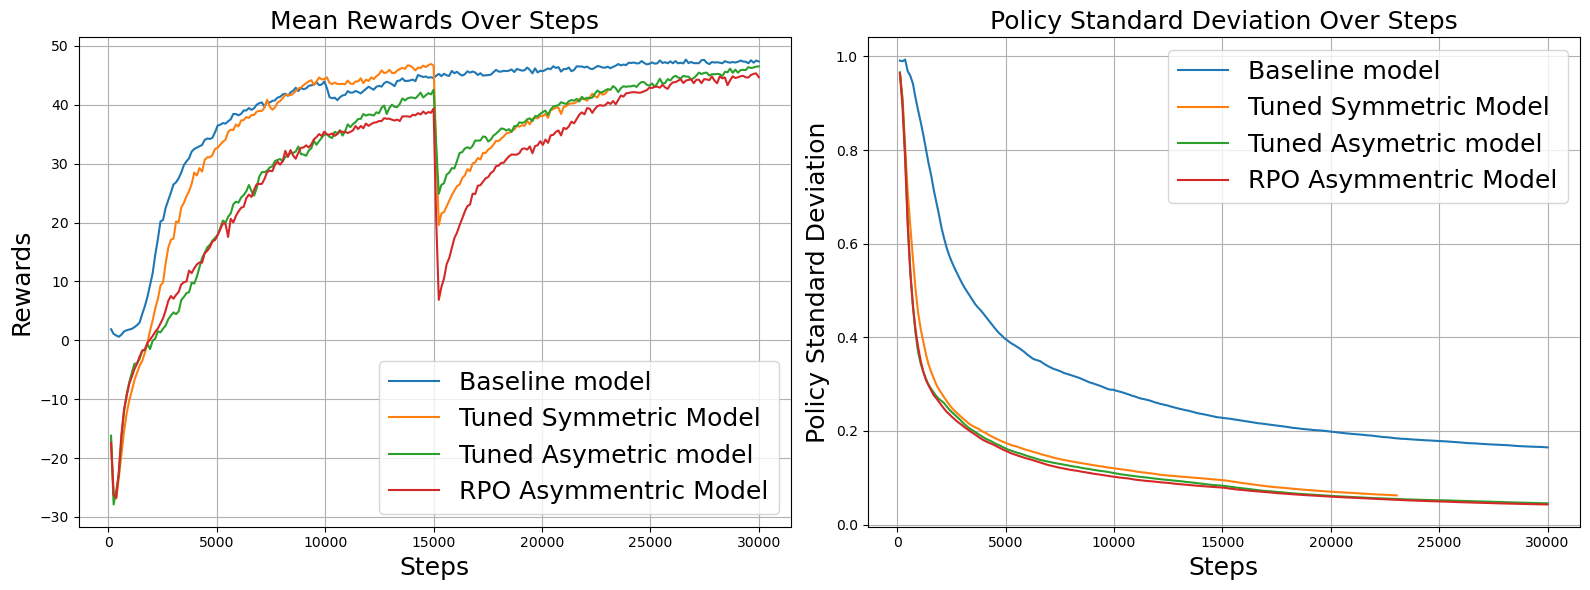

Last value for Baseline model in Object Lifting Over Steps: 12.0377
Last value for Tuned Symmetric Model in Object Lifting Over Steps: 12.3573
Last value for Tuned Asymetric model in Object Lifting Over Steps: 12.4517
Last value for RPO Asymmentric Model in Object Lifting Over Steps: 12.2026
Last value for Baseline model in Object Tracking Over Steps: 10.7350
Last value for Tuned Symmetric Model in Object Tracking Over Steps: 11.3190
Last value for Tuned Asymetric model in Object Tracking Over Steps: 11.2499
Last value for RPO Asymmentric Model in Object Tracking Over Steps: 10.9992
Last value for Baseline model in Object Fine Grained Tracking Over Steps: 1.1449
Last value for Tuned Symmetric Model in Object Fine Grained Tracking Over Steps: 1.4058
Last value for Tuned Asymetric model in Object Fine Grained Tracking Over Steps: 1.2390
Last value for RPO Asymmentric Model in Object Fine Grained Tracking Over Steps: 1.1749


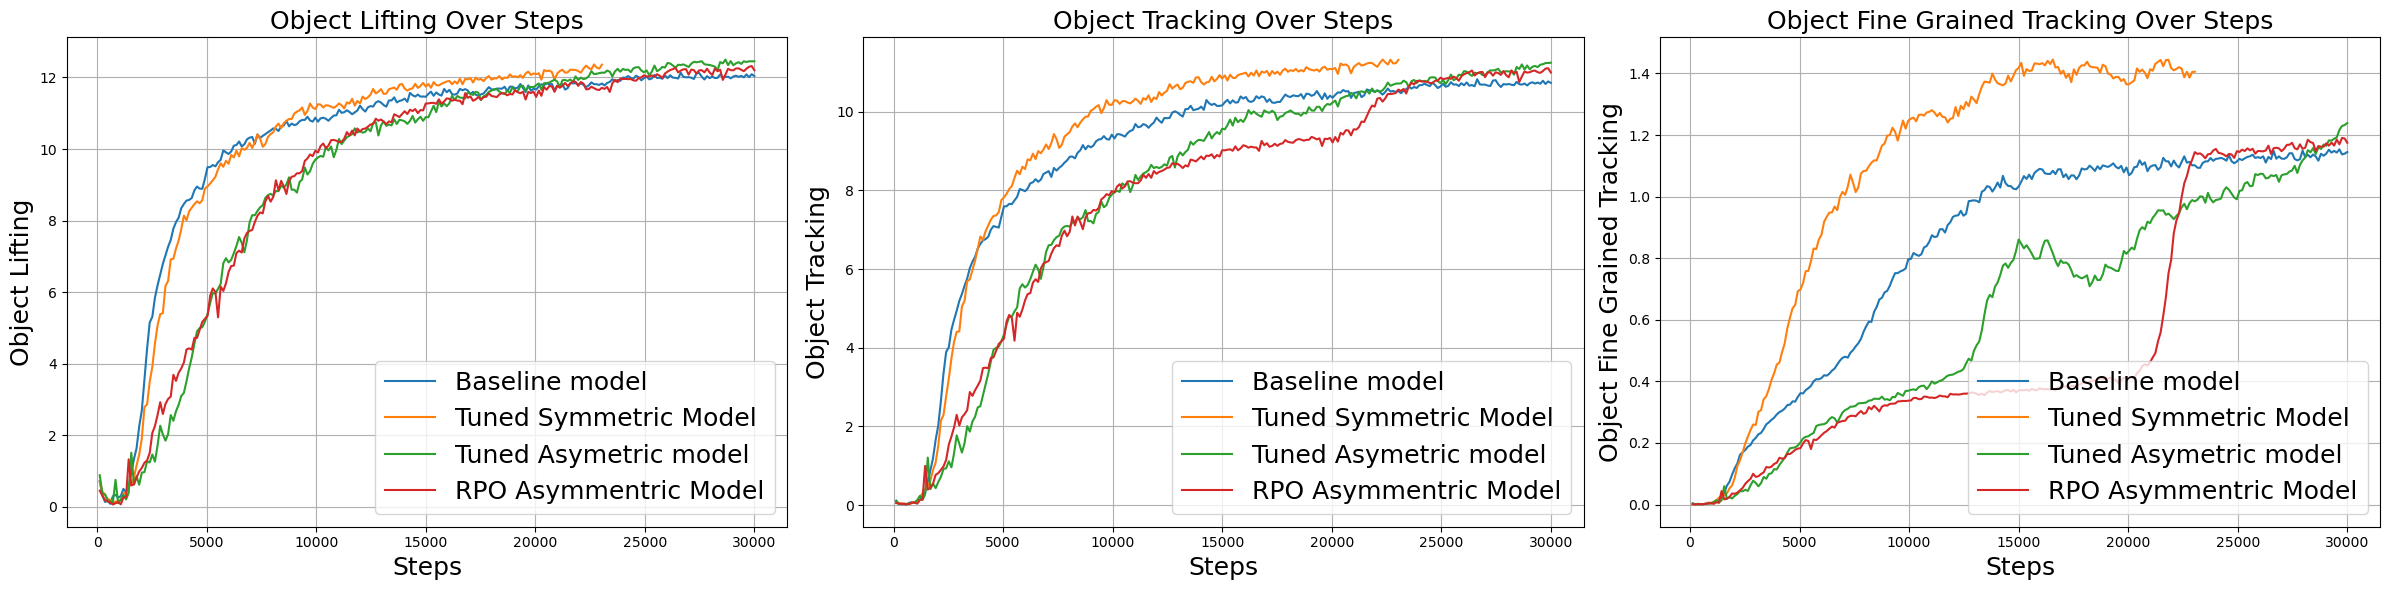

Last value for Baseline model in Action Rate over Timesteps: -0.1728
Last value for Tuned Symmetric Model in Action Rate over Timesteps: -0.1143
Last value for Tuned Asymetric model in Action Rate over Timesteps: -0.0755
Last value for RPO Asymmentric Model in Action Rate over Timesteps: -0.0566
Last value for Baseline model in Joint Velocity Over Steps: -0.9458
Last value for Tuned Symmetric Model in Joint Velocity Over Steps: -1.6537
Last value for Tuned Asymetric model in Joint Velocity Over Steps: -1.6537
Last value for RPO Asymmentric Model in Joint Velocity Over Steps: -1.8051


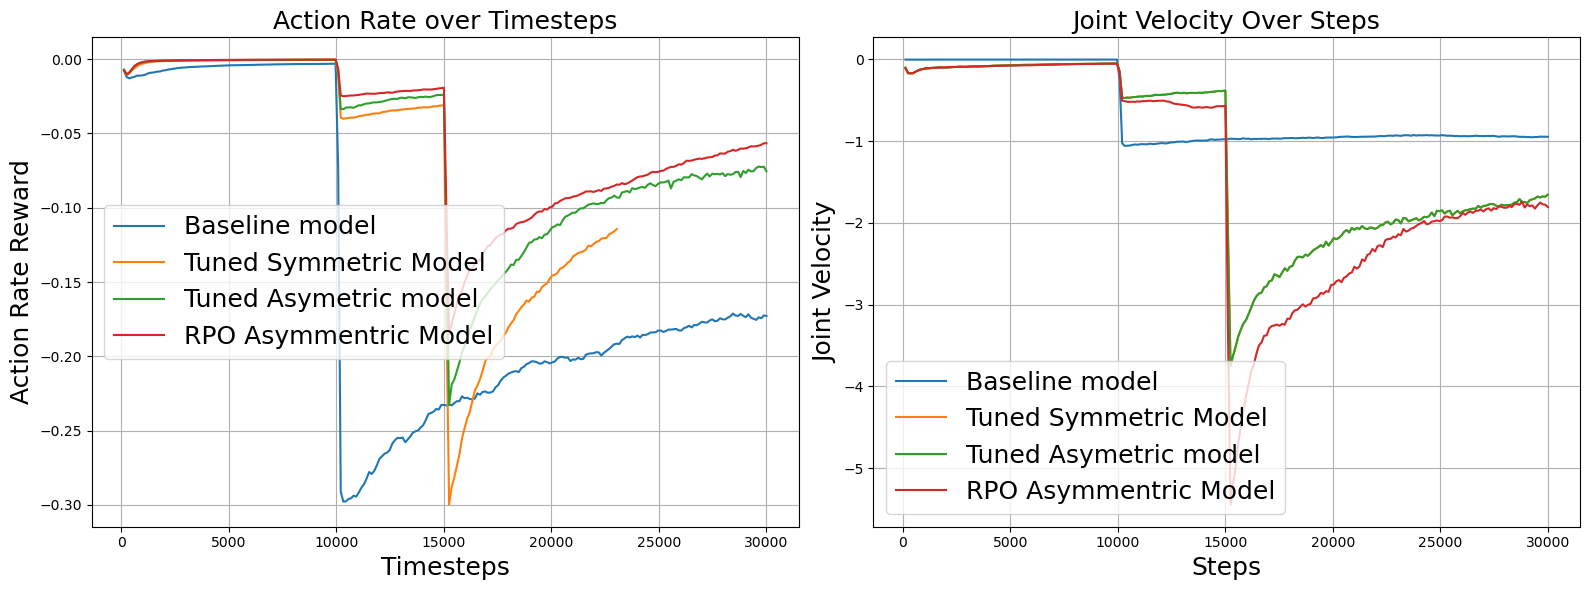


All last values:
Mean Rewards: [('Baseline model', np.float64(47.36472702026367)), ('Tuned Symmetric Model', np.float64(42.46026611328125)), ('Tuned Asymetric model', np.float64(46.52926254272461)), ('RPO Asymmentric Model', np.float64(44.699851989746094))]
Policy Standard Deviation: [('Baseline model', np.float64(0.1648721396923065)), ('Tuned Symmetric Model', np.float64(0.0624199099838733)), ('Tuned Asymetric model', np.float64(0.0454168953001499)), ('RPO Asymmentric Model', np.float64(0.0429666563868522))]
Object Lifting: [('Baseline model', np.float64(12.03768825531006)), ('Tuned Symmetric Model', np.float64(12.357287406921388)), ('Tuned Asymetric model', np.float64(12.45166301727295)), ('RPO Asymmentric Model', np.float64(12.202588081359863))]
Object Tracking: [('Baseline model', np.float64(10.73500919342041)), ('Tuned Symmetric Model', np.float64(11.319045066833496)), ('Tuned Asymetric model', np.float64(11.249876022338867)), ('RPO Asymmentric Model', np.float64(10.9992036819458

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process CSV and return data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Function to plot and print last values for each graph
def plot_and_print_last_values(ax, csv_paths, model_names, xlabel, ylabel, title):
    last_values = []
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)
        last_value = results_table['Value'].iloc[-1]
        last_values.append((model_name, last_value))
        print(f'Last value for {model_name} in {title}: {last_value:.4f}')

    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=18)
    ax.legend(fontsize=18)
    ax.grid(True)
    return last_values

def plot_graphs(csv_paths_list, model_names_list):
    # First set of plots: Mean rewards and Policy standard deviation
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    last_values_rewards = plot_and_print_last_values(axes[0], csv_paths_list[0], model_names_list[0], 'Steps', 'Rewards', 'Mean Rewards Over Steps')
    last_values_policySTD = plot_and_print_last_values(axes[1], csv_paths_list[1], model_names_list[1], 'Steps', 'Policy Standard Deviation', 'Policy Standard Deviation Over Steps')
    plt.tight_layout()
    plt.show()

    # Second set of plots: Lifting, Tracking, and Fine Grained Tracking
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    last_values_lifting = plot_and_print_last_values(axes[0], csv_paths_list[2], model_names_list[2], 'Steps', 'Object Lifting', 'Object Lifting Over Steps')
    last_values_tracking = plot_and_print_last_values(axes[1], csv_paths_list[3], model_names_list[3], 'Steps', 'Object Tracking', 'Object Tracking Over Steps')
    last_values_fine_tracking = plot_and_print_last_values(axes[2], csv_paths_list[4], model_names_list[4], 'Steps', 'Object Fine Grained Tracking', 'Object Fine Grained Tracking Over Steps')
    plt.tight_layout()
    plt.show()

    # Third set of plots: Action rate and Joint velocity
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    last_values_action_rate = plot_and_print_last_values(axes[0], csv_paths_list[5], model_names_list[5], 'Timesteps', 'Action Rate Reward', 'Action Rate over Timesteps')
    last_values_joint_velocity = plot_and_print_last_values(axes[1], csv_paths_list[6], model_names_list[6], 'Steps', 'Joint Velocity', 'Joint Velocity Over Steps')
    plt.tight_layout()
    plt.show()

    # Print all last values
    print("\nAll last values:")
    print("Mean Rewards:", last_values_rewards)
    print("Policy Standard Deviation:", last_values_policySTD)
    print("Object Lifting:", last_values_lifting)
    print("Object Tracking:", last_values_tracking)
    print("Object Fine Grained Tracking:", last_values_fine_tracking)
    print("Action Rate:", last_values_action_rate)
    print("Joint Velocity:", last_values_joint_velocity)

# Example usage:
# Add the CSV file paths and the corresponding model names for each graph
csv_paths_list = [
    ['data/mean_rew/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/mean_rew/skrl_lift_2024-09-19_21-52-33-best4by4.csv','data/mean_rew/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/mean_rew/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv'  ],  # Multiple CSVs for torque limits graph
    ['data/policy/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/policy/skrl_lift_2024-09-19_21-52-33-best4by4.csv', 'data/policy/skrl_lift_2024-09-25_12-50-39-best_asym.csv','data/policy/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],# Multiple CSVs for another graph
    ['data/rewards/lifting/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/rewards/lifting/skrl_lift_2024-09-19_21-52-33-best4by4.csv', 'data/rewards/lifting/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/lifting/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],
    ['data/rewards/tracking/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/rewards/tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv', 'data/rewards/tracking/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/tracking/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],
    ['data/rewards/fine_tracking/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/rewards/fine_tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv', 'data/rewards/fine_tracking/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/fine_tracking/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],
    ['data/rewards/action-rate/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/rewards/action-rate/skrl_lift_2024-09-19_21-52-33-best4by4.csv', 'data/rewards/action-rate/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/action-rate/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],
    ['data/rewards/joint_vel/skrl_lift_og_2024-09-27_16-35-01-og_long.csv', 'data/rewards/joint_vel/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/joint_vel/skrl_lift_2024-09-25_12-50-39-best_asym.csv', 'data/rewards/joint_vel/skrl_lift_rpo_2024-09-25_20-37-55-alpth09.csv' ],
]
model_names_list = [
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],  # Model names for the torque limits graph
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],  # Model names for another graph
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model'],
    ['Baseline model', 'Tuned Symmetric Model', 'Tuned Asymetric model', 'RPO Asymmentric Model']
]

# Call the function to plot the graphs
plot_graphs(csv_paths_list, model_names_list)

In [13]:
import pandas as pd

def process_csv(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)
    return df

def calculate_last_value_percentage_difference(csv_paths_list, model_names_list):
    differences = []

    for csv_paths, model_names in zip(csv_paths_list, model_names_list):
        df1 = process_csv(csv_paths[0])
        df2 = process_csv(csv_paths[1])

        # Get the last values
        last_value_1 = df1['Value'].iloc[-1]
        last_value_2 = df2['Value'].iloc[-1]
        
        # Calculate the percentage difference
        percentage_diff = ((last_value_2 - last_value_1) / last_value_1) * 100
        differences.append((model_names[0], model_names[1], percentage_diff))

    return differences

def generate_normal_table(differences):
    # Create a DataFrame from the differences
    df = pd.DataFrame(differences, columns=['Model 1', 'Model 2', 'Percentage Difference'])
    return df

csv_paths_list = [
    ['data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv', 'data/mean_rew/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/policy/skrl_lift_2024-09-13_22-25-30-og-policy.csv', 'data/policy/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/rewards/lifting/skrl_lift_2024-09-13_22-25-30-og-lifting.csv', 'data/rewards/lifting/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/rewards/tracking/skrl_lift_2024-09-13_22-25-30-og-tracking.csv', 'data/rewards/tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/rewards/fine_tracking/skrl_lift_2024-09-13_22-25-30-og-trackingFine.csv', 'data/rewards/fine_tracking/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv', 'data/rewards/action-rate/skrl_lift_2024-09-19_21-52-33-best4by4.csv'],
    ['data/rewards/joint_vel/skrl_lift_2024-09-13_22-25-30-og-Jvel.csv', 'data/rewards/joint_vel/skrl_lift_2024-09-19_21-52-33-best4by4.csv']
]

model_names_list = [
    ['Baseline mean_rew', 'Improved mean_rew'],
    ['Baseline policy', 'Improved policy'],
    ['Baseline lifting', 'Improved lifting'],
    ['Baseline tracking', 'Improved tracking'],
    ['Baseline fine_tracking', 'Improved fine_tracking'],
    ['Baseline action-rate', 'Improved action-rate'],
    ['Baseline joint_vel', 'Improved joint_vel']
]

differences = calculate_last_value_percentage_difference(csv_paths_list, model_names_list)
normal_table = generate_normal_table(differences)
print(normal_table)

                  Model 1                 Model 2  Percentage Difference
0       Baseline mean_rew       Improved mean_rew              -4.983655
1         Baseline policy         Improved policy             -61.384121
2        Baseline lifting        Improved lifting               7.728035
3       Baseline tracking       Improved tracking              12.574850
4  Baseline fine_tracking  Improved fine_tracking              47.274917
5    Baseline action-rate    Improved action-rate             -15.240430
6      Baseline joint_vel      Improved joint_vel             164.120178


# Baseline

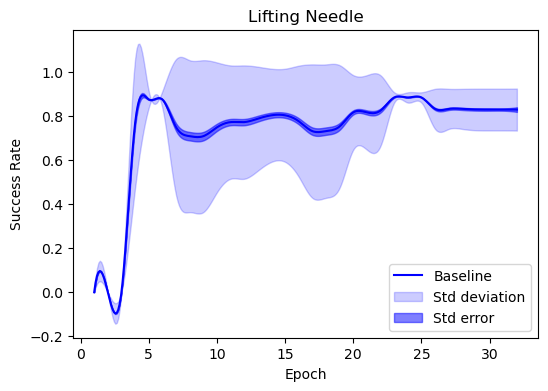

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path_og = 'data/inference/performance_log_og2.csv'  # Change this to your file path
df = pd.read_csv(file_path_og)

# Ensure 'Success rate' contains only numeric values
df['Success rate'] = pd.to_numeric(df['Success rate'], errors='coerce')

# Drop rows where 'Success rate' is NaN or invalid
df_clean = df.dropna(subset=['Success rate'])

# Group by epoch and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Epoch')['Success rate'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Epoch'].value_counts().sort_index())

# grouped_clean = df_clean.groupby('Episode')['Success rate'].agg(['mean', 'std'])
# grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
epochs = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(epochs_smooth, mean_smooth, label='Baseline', color='blue')

# Fill between for std (light shaded area)
plt.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='blue', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='blue', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Success Rate')
plt.title('Lifting Needle')
plt.legend(loc='best')

# Show the plot
plt.show()


# Improved model

Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64


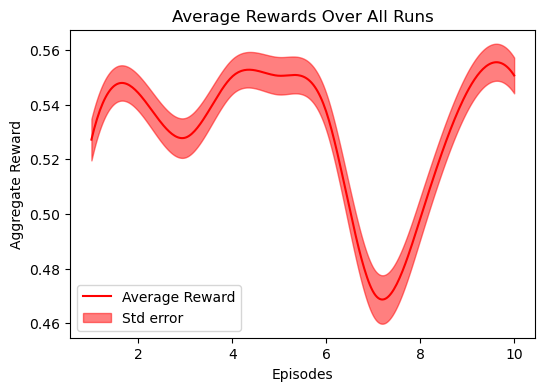

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path = 'data/inference/performance_log_best2.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
#df['Reward'] = pd.to_numeric(df['Reward'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
#df_clean = df.dropna(subset=['Reward'])
print(df['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df.groupby('Episode')['Reward'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Reward', color='red')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='red', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Aggregate Reward')
plt.title('Average Rewards Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Episode
1     780
2    1500
3    1500
4    1500
5    1500
6    1500
7    1032
Name: count, dtype: int64


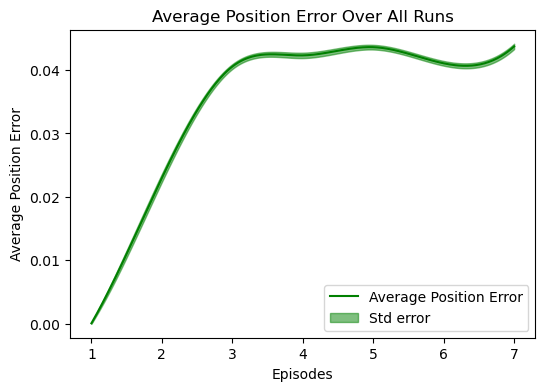

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the CSV file
file_path = 'data/inference/best.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
df['Metrics/object_pose/position_error'] = pd.to_numeric(df['Metrics/object_pose/position_error'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
df_clean = df.dropna(subset=['Metrics/object_pose/position_error'])
print(df_clean['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Episode')['Metrics/object_pose/position_error'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Position Error', color='green')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='green', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Average Position Error')
plt.title('Average Position Error Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Episode
1     780
2    1500
3    1500
4    1500
5    1500
6    1500
7    1032
Name: count, dtype: int64


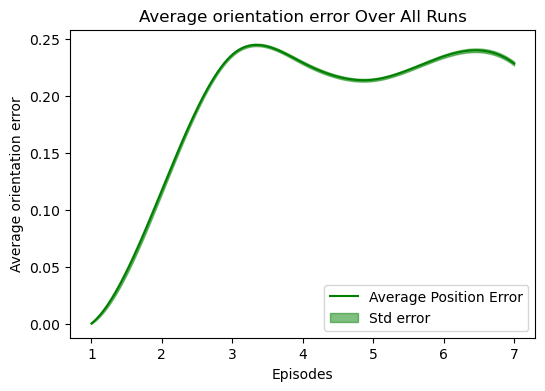

In [24]:
# Load the CSV file
file_path = 'data/inference/best.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Reward' contains only numeric values
df['Metrics/object_pose/orientation_error'] = pd.to_numeric(df['Metrics/object_pose/orientation_error'], errors='coerce')

# Drop rows where 'Reward' is NaN or invalid
df_clean = df.dropna(subset=['Metrics/object_pose/position_error'])
print(df_clean['Episode'].value_counts().sort_index())

# Group by episode and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Episode')['Metrics/object_pose/orientation_error'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

# Prepare values for plotting
episodes = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Interpolation for smoother lines
episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(episodes_smooth, mean_smooth, label='Average Position Error', color='green')

# Fill between for std (light shaded area)
#plt.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color='red', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color='green', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Average orientation error')
plt.title('Average orientation error Over All Runs')
plt.legend(loc='best')

# Show the plot
plt.show()

Average Average Position Error for Baseline Model: 0.0517
Average Average Position Error for Improved Model: 0.0436
Average Average Position Error for RPO Model: 0.0434
Average Average Orientation Error for Baseline Model: 0.7968
Average Average Orientation Error for Improved Model: 0.1817
Average Average Orientation Error for RPO Model: 0.1096


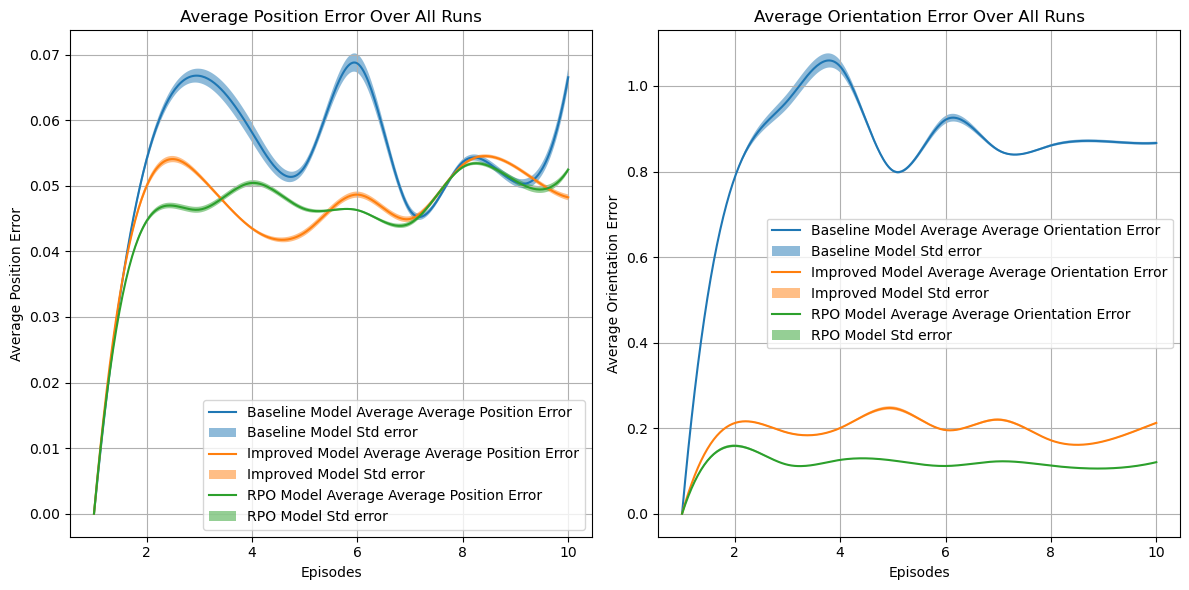


Differences between position errors:
Difference between Baseline Model and Improved Model: 0.0082
Difference between Baseline Model and RPO Model: 0.0083
Difference between Improved Model and RPO Model: 0.0001

Differences between orientation errors:
Difference between Baseline Model and Improved Model: 0.6151
Difference between Baseline Model and RPO Model: 0.6872
Difference between Improved Model and RPO Model: 0.0721


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def process_csv(file_path, metric):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Ensure the metric contains only numeric values
    df[metric] = pd.to_numeric(df[metric], errors='coerce')

    # Drop rows where the metric is NaN or invalid
    df_clean = df.dropna(subset=[metric])

    # Group by episode and calculate mean, std, and standard error
    grouped_clean = df_clean.groupby('Episode')[metric].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Episode'].value_counts().sort_index())

    return grouped_clean

def plot_graph(ax, grouped_clean, label_prefix, ylabel):
    # Prepare values for plotting
    episodes = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
    mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
    std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
    stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

    # Plot the baseline mean line
    ax.plot(episodes_smooth, mean_smooth, label=f'{label_prefix} Average {ylabel}')

    # Fill between for standard error (dark shaded area)
    ax.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, alpha=0.5, label=f'{label_prefix} Std error')

    # Adding labels, title, and legend
    ax.set_xlabel('Episodes')
    ax.set_ylabel(ylabel)
    ax.legend(loc='best')
    ax.grid(True)

    # Print average metric
    avg_metric = mean.mean()
    print(f'Average {ylabel} for {label_prefix}: {avg_metric:.4f}')
    return avg_metric

# File paths for the three CSV files
file_paths = [
    'data/inference/performance_log_og2.csv',  # Change this to your file path
    'data/inference/performance_log_asym.csv',
    'data/inference/performance_log_rpo.csv'   # Change this to your file path
]

# Metrics to plot
metrics = ['position_error', 'orientation_error']
ylabels = ['Average Position Error', 'Average Orientation Error']

# Process the CSV files for each metric
grouped_clean_1_1 = process_csv(file_paths[0], metrics[0])
grouped_clean_1_2 = process_csv(file_paths[1], metrics[0])
grouped_clean_1_3 = process_csv(file_paths[2], metrics[0])
grouped_clean_2_1 = process_csv(file_paths[0], metrics[1])
grouped_clean_2_2 = process_csv(file_paths[1], metrics[1])
grouped_clean_2_3 = process_csv(file_paths[2], metrics[1])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph with three CSV files for position error
avg_position_errors = []
avg_position_errors.append(('Baseline Model', plot_graph(axes[0], grouped_clean_1_1, 'Baseline Model', ylabels[0])))
avg_position_errors.append(('Improved Model', plot_graph(axes[0], grouped_clean_1_2, 'Improved Model', ylabels[0])))
avg_position_errors.append(('RPO Model', plot_graph(axes[0], grouped_clean_1_3, 'RPO Model', ylabels[0])))
axes[0].set_title('Average Position Error Over All Runs')

# Plot the second graph with three CSV files for orientation error
avg_orientation_errors = []
avg_orientation_errors.append(('Baseline Model', plot_graph(axes[1], grouped_clean_2_1, 'Baseline Model', ylabels[1])))
avg_orientation_errors.append(('Improved Model', plot_graph(axes[1], grouped_clean_2_2, 'Improved Model', ylabels[1])))
avg_orientation_errors.append(('RPO Model', plot_graph(axes[1], grouped_clean_2_3, 'RPO Model', ylabels[1])))
axes[1].set_title('Average Orientation Error Over All Runs')

plt.tight_layout()
plt.show()

# Print differences between metrics for position error
print("\nDifferences between position errors:")
for i in range(len(avg_position_errors)):
    for j in range(i + 1, len(avg_position_errors)):
        label1, avg1 = avg_position_errors[i]
        label2, avg2 = avg_position_errors[j]
        diff = avg1 - avg2
        print(f'Difference between {label1} and {label2}: {diff:.4f}')

# Print differences between metrics for orientation error
print("\nDifferences between orientation errors:")
for i in range(len(avg_orientation_errors)):
    for j in range(i + 1, len(avg_orientation_errors)):
        label1, avg1 = avg_orientation_errors[i]
        label2, avg2 = avg_orientation_errors[j]
        diff = avg1 - avg2
        print(f'Difference between {label1} and {label2}: {diff:.4f}')

Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64
Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64
Episode
1      990
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64


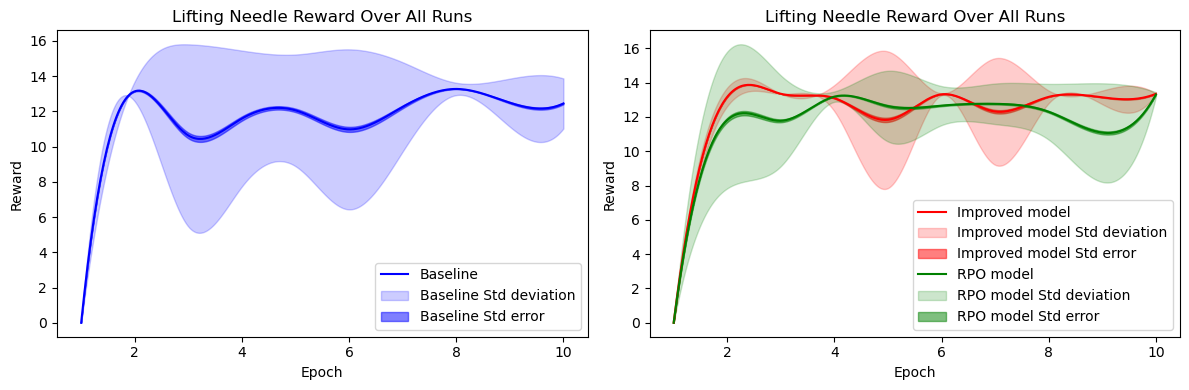

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path)

    # Ensure 'lifting_object' contains only numeric values
    df['lifting_object'] = pd.to_numeric(df['lifting_object'], errors='coerce')

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['lifting_object'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())
    print(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Reward')
    ax.set_title('Lifting Needle Reward Over All Runs')
    ax.legend(loc='best')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_asym.csv', 'Improved model', 'red'),
]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Process and plot each dataset for the first subplot
process_and_plot(datasets[0][0], axs[0], datasets[0][1], datasets[0][2])

# Process and plot each dataset for the second subplot
process_and_plot(datasets[1][0], axs[1], datasets[1][1], datasets[1][2])
process_and_plot('data/inference/performance_log_rpo.csv', axs[1], 'RPO model', 'green')

# Show the plot
plt.tight_layout()
plt.show()

Average Action Rate for Baseline: -0.0008
Average Action Rate for Improved model: -0.0000
Average Action Rate for RPO model: -0.0000


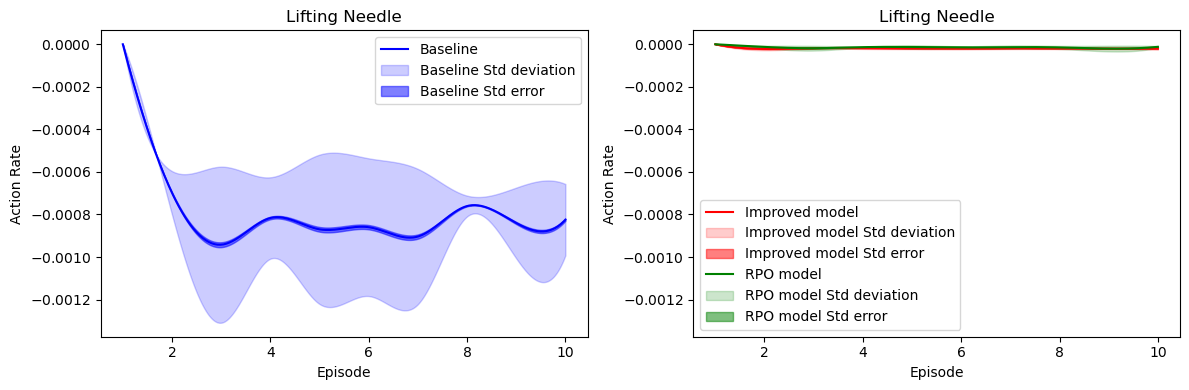


Differences between metrics:
Difference between Improved model and RPO model: -0.0000

Difference between Baseline and Improved model: -0.0007


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'action_rate': float})

    # Ensure 'action_rate' contains only numeric values
    df['action_rate'] = pd.to_numeric(df['action_rate'], errors='coerce')

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['action_rate'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    episodes = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
    mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
    std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
    stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

    # Plot the graph
    ax.plot(episodes_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Action Rate')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

    # Print average action rate
    avg_action_rate = mean.mean()
    print(f'Average Action Rate for {label}: {avg_action_rate:.4f}')
    return avg_action_rate

# List of file paths and labels for the first plot (excluding Improved model and RPO model)
datasets_first_plot = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue')
]

# List of file paths and labels for the second plot (including RPO model)
datasets_second_plot = [
    ('data/inference/performance_log_asym.csv', 'Improved model', 'red'),
    ('data/inference/performance_log_rpo.csv', 'RPO model', 'green')
]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Process and plot each dataset for the first subplot
avg_errors_first_plot = []
for file_path, label, color in datasets_first_plot:
    avg_error = process_and_plot(file_path, axs[0], label, color)
    avg_errors_first_plot.append((label, avg_error))

# Process and plot each dataset for the second subplot
avg_errors_second_plot = []
for file_path, label, color in datasets_second_plot:
    avg_error = process_and_plot(file_path, axs[1], label, color)
    avg_errors_second_plot.append((label, avg_error))

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Print differences between metrics
print("\nDifferences between metrics:")
for i in range(len(avg_errors_second_plot)):
    for j in range(i + 1, len(avg_errors_second_plot)):
        label1, avg1 = avg_errors_second_plot[i]
        label2, avg2 = avg_errors_second_plot[j]
        diff = avg1 - avg2
        print(f'Difference between {label1} and {label2}: {diff:.4f}')

# Calculate and print the difference between Baseline and Improved model
baseline_avg = avg_errors_first_plot[0][1] if avg_errors_first_plot else None
improved_avg = next((avg for label, avg in avg_errors_second_plot if label == 'Improved model'), None)

if baseline_avg is not None and improved_avg is not None:
    diff_baseline_improved = baseline_avg - improved_avg
    print(f'\nDifference between Baseline and Improved model: {diff_baseline_improved:.4f}')

Average Position Error for Baseline: 0.0517
Average Position Error for Improved model: 0.0436
Average Position Error for RPO model: 0.0434


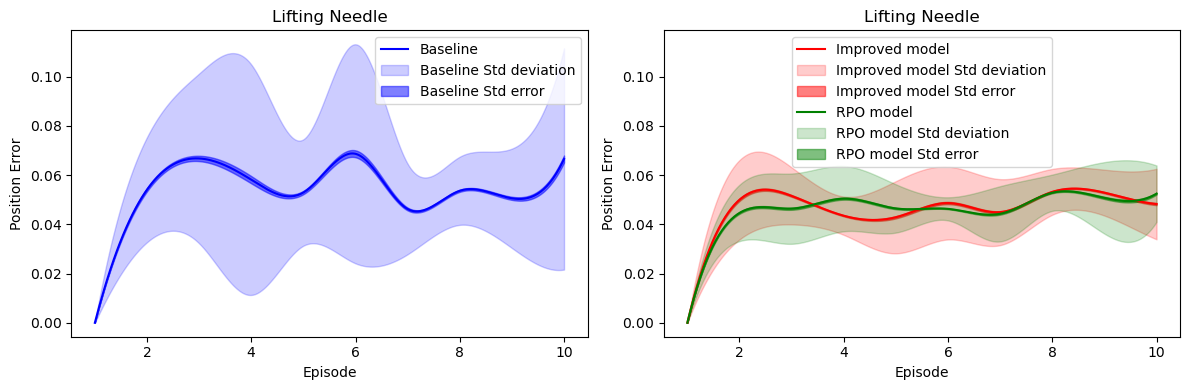


Differences between metrics:
Difference between Improved model and RPO model: 0.0001


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'position_error': float})

    # Ensure 'position_error' contains only numeric values
    df['position_error'] = pd.to_numeric(df['position_error'], errors='coerce')

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['position_error'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    episodes = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    episodes_smooth = np.linspace(episodes.min(), episodes.max(), 300)
    mean_smooth = make_interp_spline(episodes, mean)(episodes_smooth)
    std_smooth = make_interp_spline(episodes, std)(episodes_smooth)
    stderr_smooth = make_interp_spline(episodes, stderr)(episodes_smooth)

    # Plot the graph
    ax.plot(episodes_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(episodes_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(episodes_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Position Error')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

    # Print average position error
    avg_position_error = mean.mean()
    print(f'Average Position Error for {label}: {avg_position_error:.4f}')
    return avg_position_error

# List of file paths and labels for the first plot (excluding Improved model and RPO model)
datasets_first_plot = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue')
]

# List of file paths and labels for the second plot (including RPO model)
datasets_second_plot = [
    ('data/inference/performance_log_asym.csv', 'Improved model', 'red'),
    ('data/inference/performance_log_rpo.csv', 'RPO model', 'green')
]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Process and plot each dataset for the first subplot
avg_errors_first_plot = []
for file_path, label, color in datasets_first_plot:
    avg_error = process_and_plot(file_path, axs[0], label, color)
    avg_errors_first_plot.append((label, avg_error))

# Process and plot each dataset for the second subplot
avg_errors_second_plot = []
for file_path, label, color in datasets_second_plot:
    avg_error = process_and_plot(file_path, axs[1], label, color)
    avg_errors_second_plot.append((label, avg_error))

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Print differences between metrics
print("\nDifferences between metrics:")
for i in range(len(avg_errors_second_plot)):
    for j in range(i + 1, len(avg_errors_second_plot)):
        label1, avg1 = avg_errors_second_plot[i]
        label2, avg2 = avg_errors_second_plot[j]
        diff = avg1 - avg2
        print(f'Difference between {label1} and {label2}: {diff:.4f}')

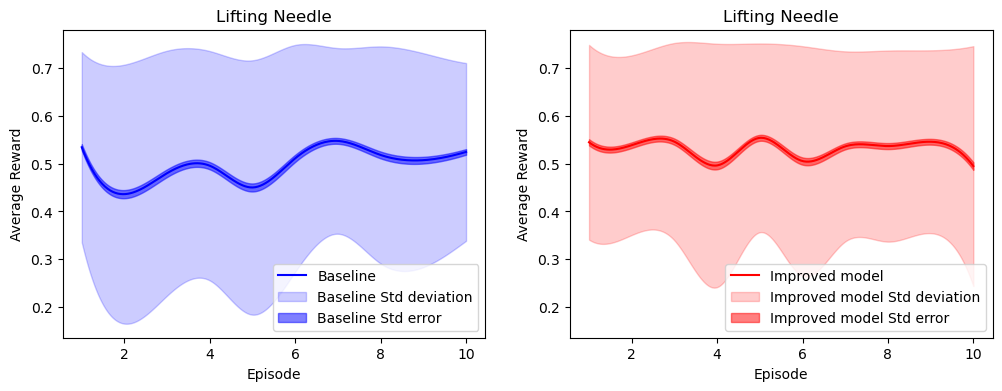

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color):
    df = pd.read_csv(file_path, dtype={'Reward': float})

    # Ensure 'action_rate' contains only numeric values
    df['Reward'] = pd.to_numeric(df['Reward'], errors='coerce')


    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')['Reward'].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Average Reward')
    ax.set_title('Lifting Needle')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths and labels
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_asym.csv', 'Improved model', 'red')
]

# Create subplots
fig, axs = plt.subplots(1, len(datasets), figsize=(6 * len(datasets), 4))

# Process and plot each dataset
for i, (file_path, label, color) in enumerate(datasets):
    process_and_plot(file_path, axs[i], label, color)

# Ensure the y-axis scale is the same on both graphs
y_min = min(ax.get_ylim()[0] for ax in axs)
y_max = max(ax.get_ylim()[1] for ax in axs)
for ax in axs:
    ax.set_ylim(y_min, y_max)

plt.show()

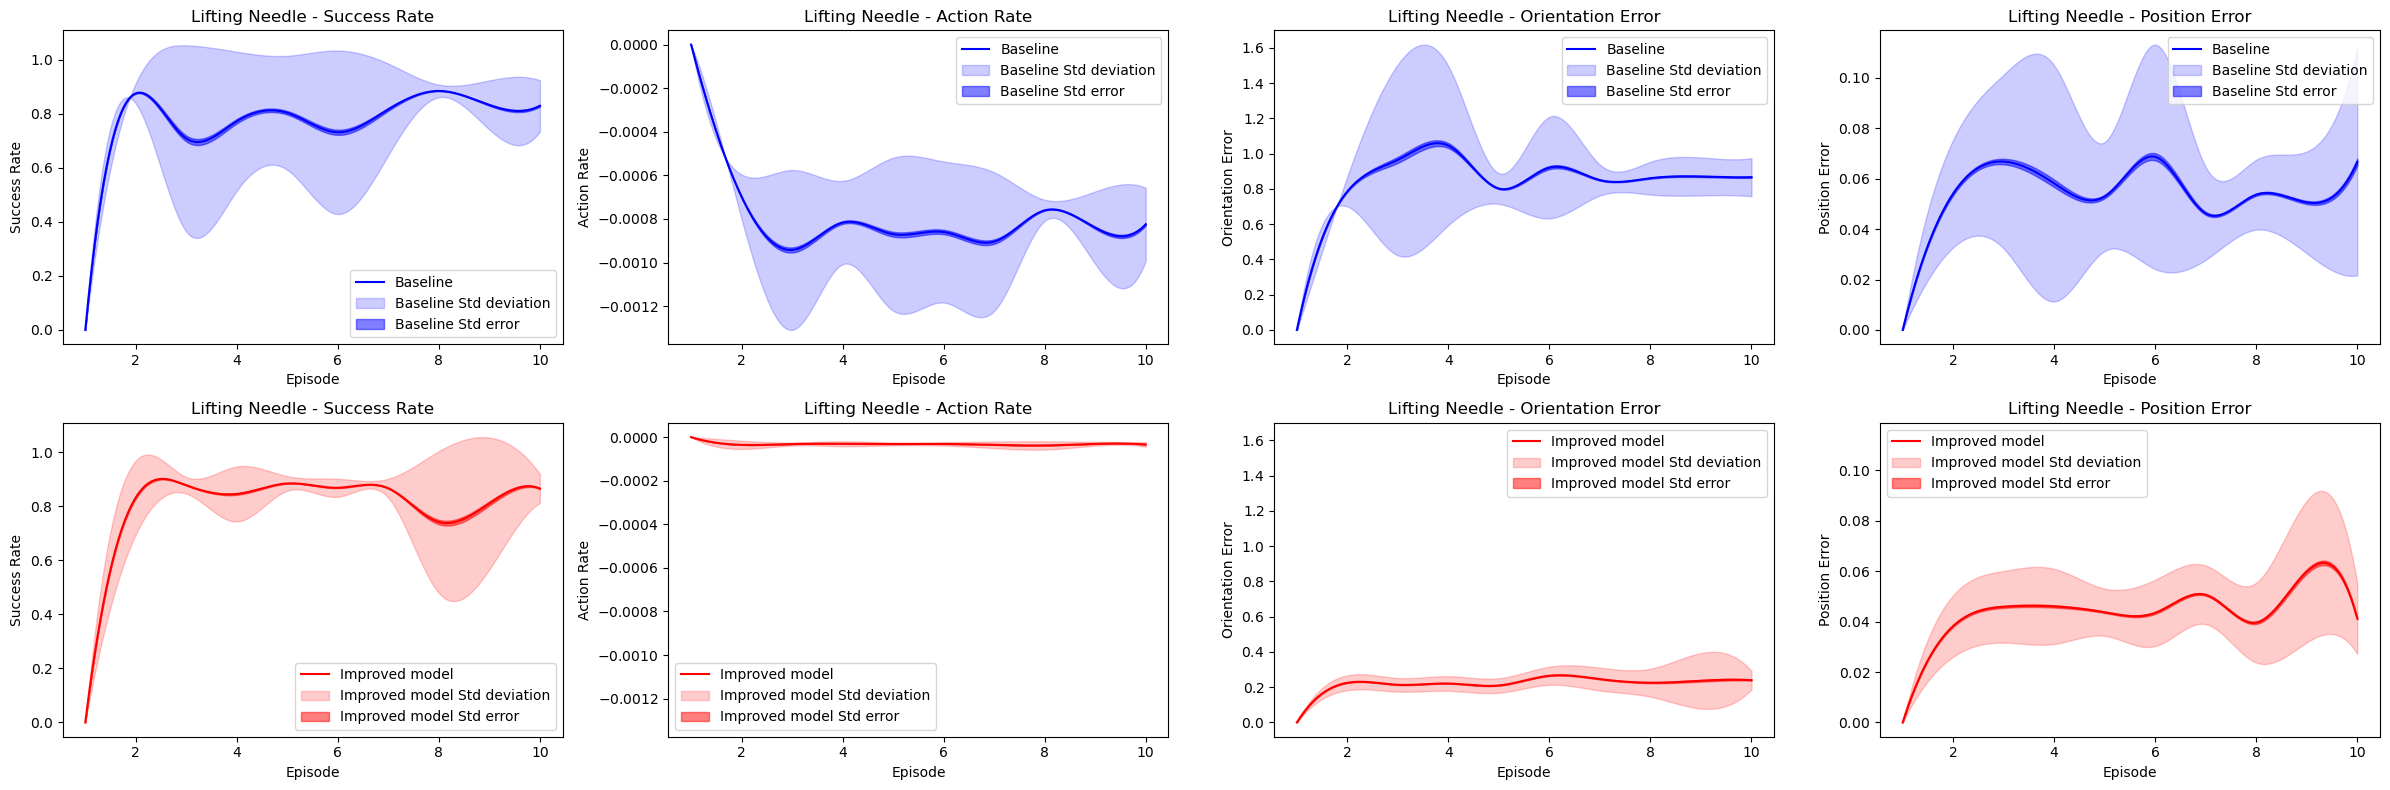

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import ScalarFormatter

# Function to process and plot data
def process_and_plot(file_path, ax, label, color, column_name):
    df = pd.read_csv(file_path, dtype={column_name: float})

    # Ensure the column contains only numeric values
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Drop rows where 'Epoch' is 32
    df = df[df['Episode'] != 32]

    # Group by epoch and calculate mean, std, and standard error
    grouped_clean = df.groupby('Episode')[column_name].agg(['mean', 'std'])
    grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df['Episode'].value_counts().sort_index())

    # Prepare values for plotting
    epochs = grouped_clean.index.to_numpy()
    mean = np.nan_to_num(grouped_clean['mean'])
    std = np.nan_to_num(grouped_clean['std'])
    stderr = np.nan_to_num(grouped_clean['stderr'])

    # Interpolation for smoother lines
    epochs_smooth = np.linspace(epochs.min(), epochs.max(), 300)
    mean_smooth = make_interp_spline(epochs, mean)(epochs_smooth)
    std_smooth = make_interp_spline(epochs, std)(epochs_smooth)
    stderr_smooth = make_interp_spline(epochs, stderr)(epochs_smooth)

    # Plot the graph
    ax.plot(epochs_smooth, mean_smooth, label=label, color=color)
    ax.fill_between(epochs_smooth, mean_smooth - std_smooth, mean_smooth + std_smooth, color=color, alpha=0.2, label=f'{label} Std deviation')
    ax.fill_between(epochs_smooth, mean_smooth - stderr_smooth, mean_smooth + stderr_smooth, color=color, alpha=0.5, label=f'{label} Std error')
    ax.set_xlabel('Episode')
    ax.set_ylabel(column_name.replace('_', ' ').title())
    ax.set_title(f'Lifting Needle - {column_name.replace("_", " ").title()}')
    ax.legend(loc='best')

    # Force display of actual numbers instead of scientific notation
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')

# List of file paths, labels, and colors
datasets = [
    ('data/inference/performance_log_og2.csv', 'Baseline', 'blue'),
    ('data/inference/performance_log_asym.csv', 'Improved model', 'red')
]

# List of columns to plot
columns = ['Success rate', 'action_rate', 'orientation_error','position_error', ]

# Create subplots in a 2x4 grid
fig, axs = plt.subplots(2, len(columns), figsize=(6 * len(columns), 8))

# Process and plot each dataset for each column
for i, column_name in enumerate(columns):
    for j, (file_path, label, color) in enumerate(datasets):
        process_and_plot(file_path, axs[j, i], label, color, column_name)

# Ensure the y-axis scale is the same on all graphs for each metric
for i in range(len(columns)):
    y_min = min(axs[j, i].get_ylim()[0] for j in range(len(datasets)))
    y_max = max(axs[j, i].get_ylim()[1] for j in range(len(datasets)))
    for j in range(len(datasets)):
        axs[j, i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()